# This notebook will show how to create imballance bars from binance trading data

1. connect to binance api

When connecting to the binance api, data will take the following form

```python
[
  {
    "a": 26129,         // Aggregate tradeId
    "p": "0.01633102",  // Price
    "q": "4.70443515",  // Quantity
    "f": 27781,         // First tradeId
    "l": 27781,         // Last tradeId
    "T": 1498793709153, // Timestamp
    "m": true,          // Was the buyer the maker?
    "M": true           // Was the trade the best price match?
  }
]
```


Trades that fill at the time, from the same order, with the same price will have the quantity aggregated.

In [1]:
SYMBOL = 'ETHBTC'       # Trading Symbol
TIME_ENTITY = 'days'    # Use i.e month
TIME_ENTITY_COUNT = '1' # Months of historic data

In [3]:
import config
from binance.client import Client

client = Client(config.API_KEY, config.API_SECRET)

start_str=f'{TIME_ENTITY_COUNT} {TIME_ENTITY} ago UTC'

agg_trades = client.aggregate_trade_iter(symbol=SYMBOL, start_str=start_str)

trades = [trade for trade in agg_trades]

print(f"Len af trades list: {len(trades)}") # More than the 500 max for the "easy" APIs

trades[0:1]  # show the first entry

Len af trades list: 168512


[{'a': 258011259,
  'p': '0.07781400',
  'q': '0.00130000',
  'f': 293670343,
  'l': 293670343,
  'T': 1630858192152,
  'm': False,
  'M': True}]

In [19]:
import pandas as pd

df = pd.DataFrame(trades)

pandas.core.series.Series

In [28]:
import datetime
l = [datetime.datetime.fromtimestamp(timestamp / 1000) for timestamp in df.loc[:,'T'].astype(int)]
df.index=l

In [35]:
import matplotlib as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11,4)})

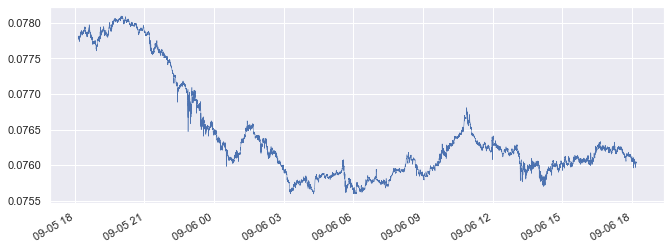

In [38]:
df["p"].astype(float).plot(linewidth=0.5)